# MDS, NK cells

EG54, EG55, EG56, EG57 and EG58 are MDS cases. 

In this notebook samples are merged together (after which NK cell cluster is defined and NK cells are selected for further analysis). UMAPs are generated based on RNA, proteins or latent space. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot
from pySankey import sankey

import warnings

warnings.filterwarnings('ignore')



Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#Easigenomics dataset, only one sample

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG54_norm.h5ad')

In [3]:
#Easigenomics dataset, only one sample

adata1 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG55_norm.h5ad')

In [4]:
#Easigenomics dataset, only one sample

adata2 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG56_norm.h5ad')

In [5]:
#Easigenomics dataset, only one sample

adata3 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG57_norm.h5ad')

In [6]:
#Easigenomics dataset, only one sample

adata4 = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/EG58_norm.h5ad')

In [7]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata, use_rep="X_totalVI")    

sc.tl.umap(adata)


In [8]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata1, use_rep="X_totalVI")    

sc.tl.umap(adata1)

In [9]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata2, use_rep="X_totalVI")    

sc.tl.umap(adata2)

In [10]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata3, use_rep="X_totalVI")    

sc.tl.umap(adata3)

EG54


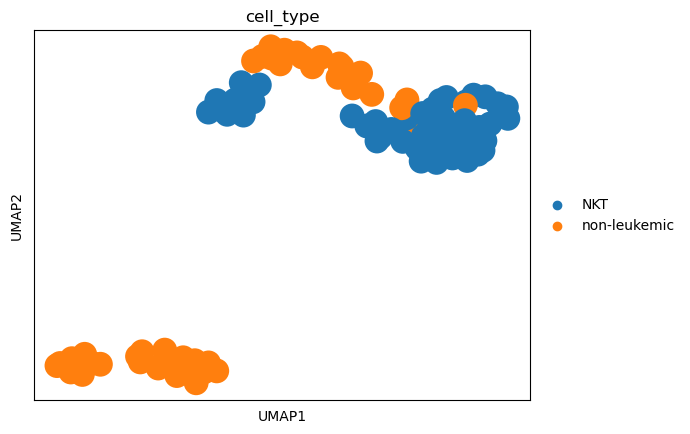

EG55


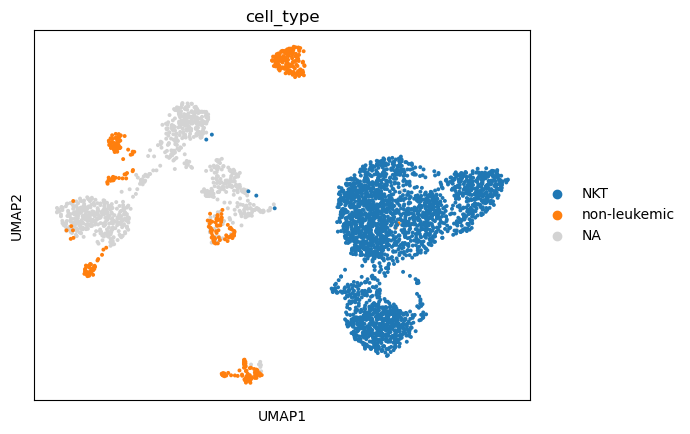

EG56


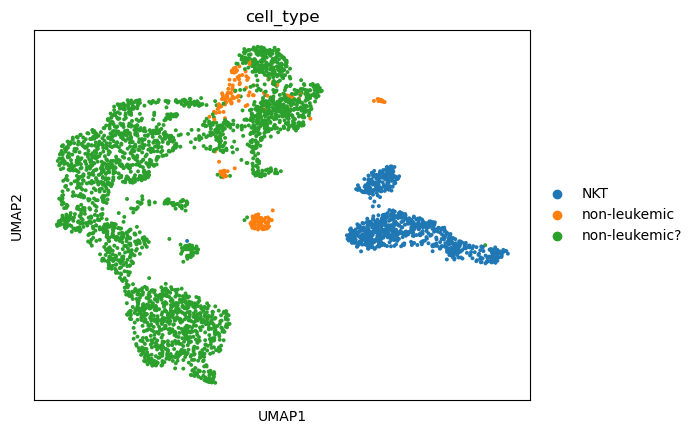

EG57


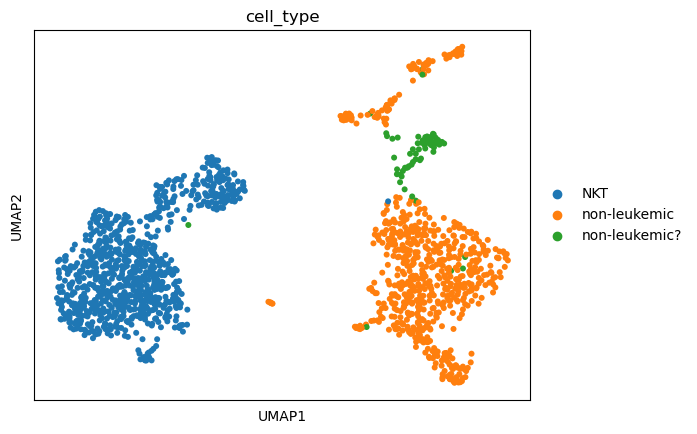

EG58


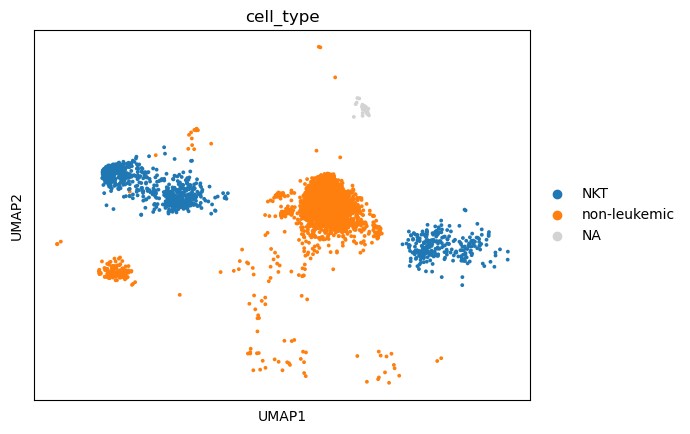

In [11]:
#latent space

print("EG54")
sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')

print("EG55")
sc.pl.umap(adata1, color = ['cell_type'], color_map = 'viridis')

print("EG56")
sc.pl.umap(adata2, color = ['cell_type'], color_map = 'viridis')

print("EG57")
sc.pl.umap(adata3, color = ['cell_type'], color_map = 'viridis')

print("EG58")
sc.pl.umap(adata4, color = ['cell_type'], color_map = 'viridis')

In [12]:
adata_merged = adata.concatenate(adata1,adata2,adata3,adata4, index_unique=None)

In [13]:
adata_merged.obs['cell_type']

AAGACCTAGTCCGTAT-1-154             NKT
AATCCAGCAGATAATG-1-154    non-leukemic
ACACCAAAGTGTTTGC-1-154    non-leukemic
ACGCAGCCAGACGTAG-1-154    non-leukemic
ACGGAGAGTCCTCTTG-1-154             NKT
                              ...     
TTTGTCACACATTCGA-1-102    non-leukemic
TTTGTCAGTACCCAAT-1-102    non-leukemic
TTTGTCAGTTCCACTC-1-102    non-leukemic
TTTGTCATCAACACCA-1-102    non-leukemic
TTTGTCATCTACGAGT-1-102    non-leukemic
Name: cell_type, Length: 13184, dtype: object

In [14]:
#surface protein expression, DSB selected
prot=adata_merged.obsm['protein_expression_dsb']

In [15]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD2': 'CD2_prot', 'CD38': 'CD38_prot', 'CD34': 'CD34_prot', 'CD44': 'CD44_prot'})

In [16]:
#adding protein information to obs

a = adata_merged.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata_merged.obs=adata1

In [18]:
adata_merged

AnnData object with n_obs × n_vars = 13184 × 5031
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'batch', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2_prot', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44_prot', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    var: 'gene_ids', 'feature_types', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm

In [19]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged, use_rep="X_totalVI")    

sc.tl.umap(adata_merged)

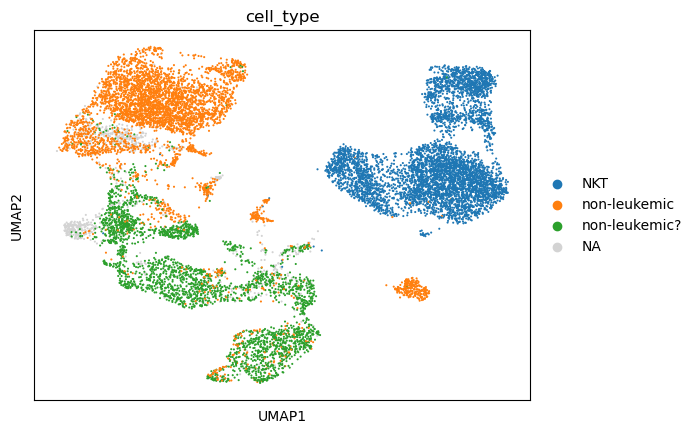

In [20]:
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

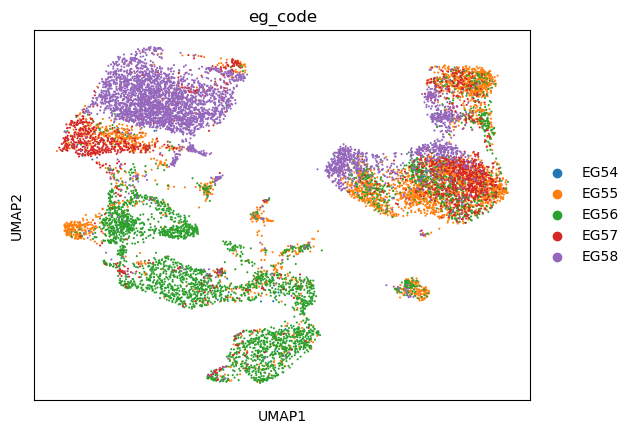

In [21]:
sc.pl.umap(adata_merged, color = ['eg_code'], color_map = 'viridis')

In [22]:
#To find gene names

#result = [i for i in adata_neurips.var_names if i.startswith('TC')]
#print(result)

In [23]:
sc.tl.leiden(adata_merged, resolution = 0.15, key_added = "leiden_0.15")

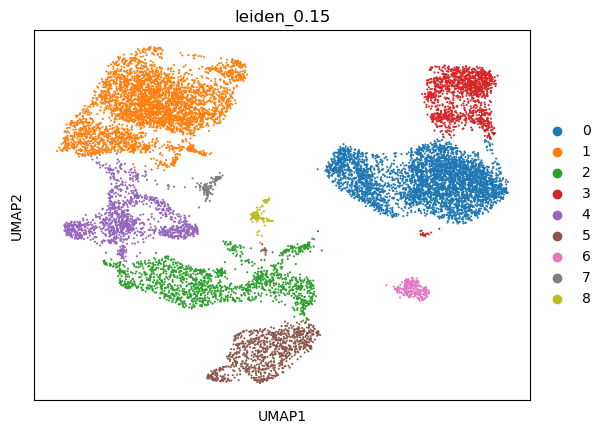

In [24]:
sc.pl.umap(adata_merged, color=['leiden_0.15'], ncols =3)

In [25]:
#Markers received from HRUH, KLRC1 = NKG2A

nk_genes = ["FGFBP2", "FCGR3A", "S1PR5", "KLRC1", "KLRC2", "KLRC3", "KLRD1", "GNLY","GZMB", "CX3CR1", "GPR56", "PRF1", "KLRB1", "SPON2", "NKG7", "TTC38", "FCRL6", "LILRB1","PLAC8", "MBP"]

nk_genes2 = ["NKG2A","NCAM1","GZMK","GZMA","KLRB1","KLRC2","GZMH","LAG3","B2M","HLA-DRA","OAS3","MX1","IRF7","MX2","IRF9","OAS1","OAS2", "EIF2AK2", "TNFRSF18", "TNFRSF9",  "TNFRSF4",  "CRTAM", "ENTPD1",  "HAVCR2",  "TIGIT", "TNFSF10", "BCL2L11", "CCL3", "CCL4", "TNF", "IFNG", "CD69"]

In [26]:
#Used to check which genes were measured

listOfmarkers= nk_genes
markers = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers.append(x)
        



GNLY
GZMB
KLRB1
NKG7
PLAC8
MBP


In [27]:
#Used to check which genes were measured

listOfmarkers= nk_genes2
markers2 = []

for x in listOfmarkers:
    if x in adata_merged.var_names:
        print(x)
        markers2.append(x)




GZMA
KLRB1
B2M
HLA-DRA
MX1
IRF7
MX2
EIF2AK2
CD69


In [28]:
nk_markers = [markers, markers2]

nk_markers = list(np.concatenate(nk_markers).flat)

nk_markers

['GNLY',
 'GZMB',
 'KLRB1',
 'NKG7',
 'PLAC8',
 'MBP',
 'GZMA',
 'KLRB1',
 'B2M',
 'HLA-DRA',
 'MX1',
 'IRF7',
 'MX2',
 'EIF2AK2',
 'CD69']

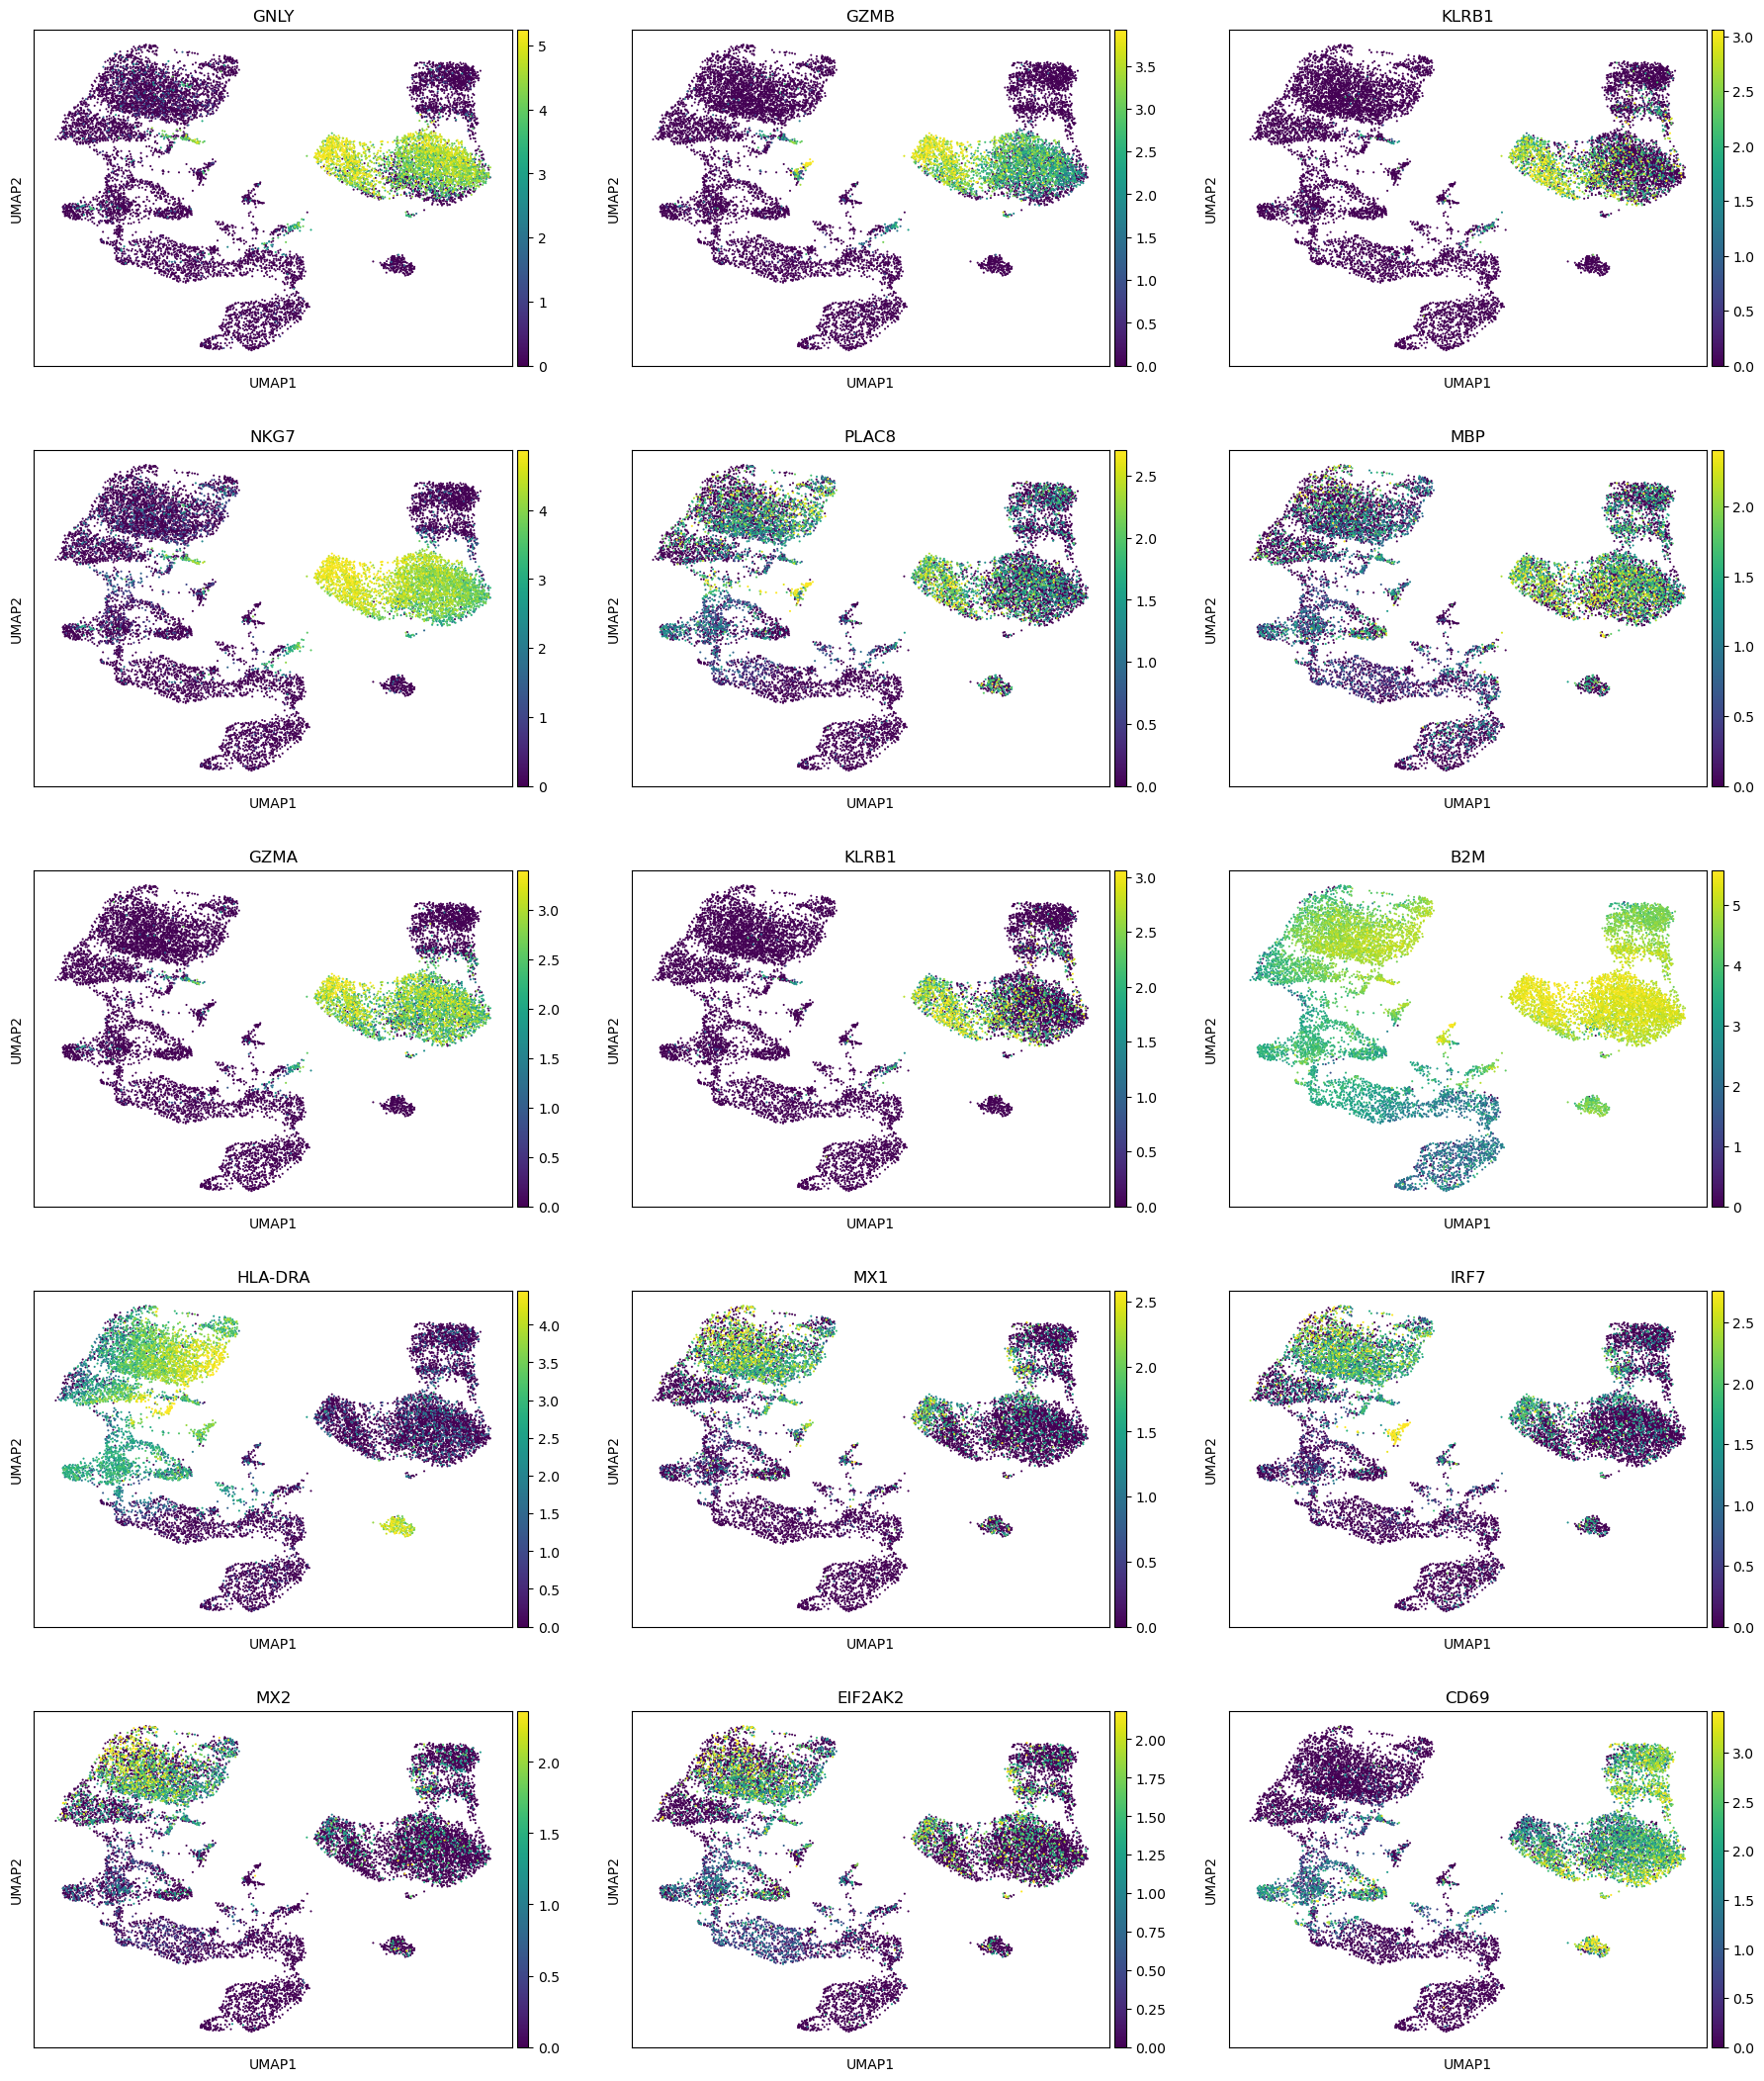

In [29]:
sc.pl.umap(adata_merged, color=nk_markers, ncols =3, vmax="p99")

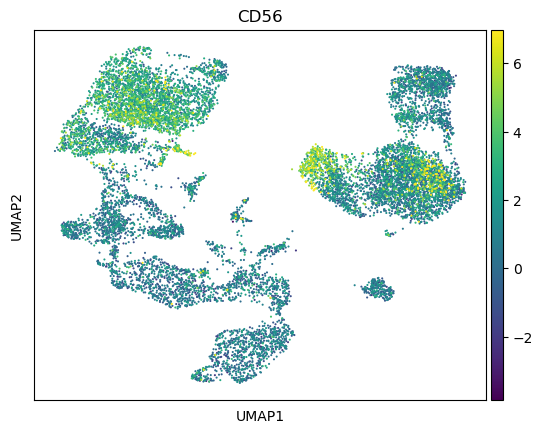

In [30]:
nk_prot = ['CD56']

sc.pl.umap(adata_merged, color=nk_prot, ncols =3, vmax="p99")

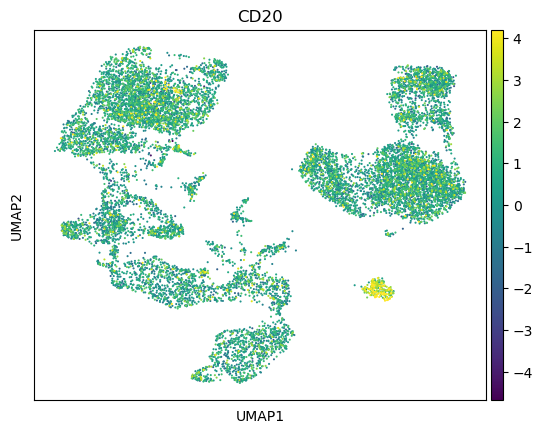

In [31]:
sc.pl.umap(adata_merged, color=['CD20'], ncols =3, vmax="p99") #corresponding MS4A1 gene not found

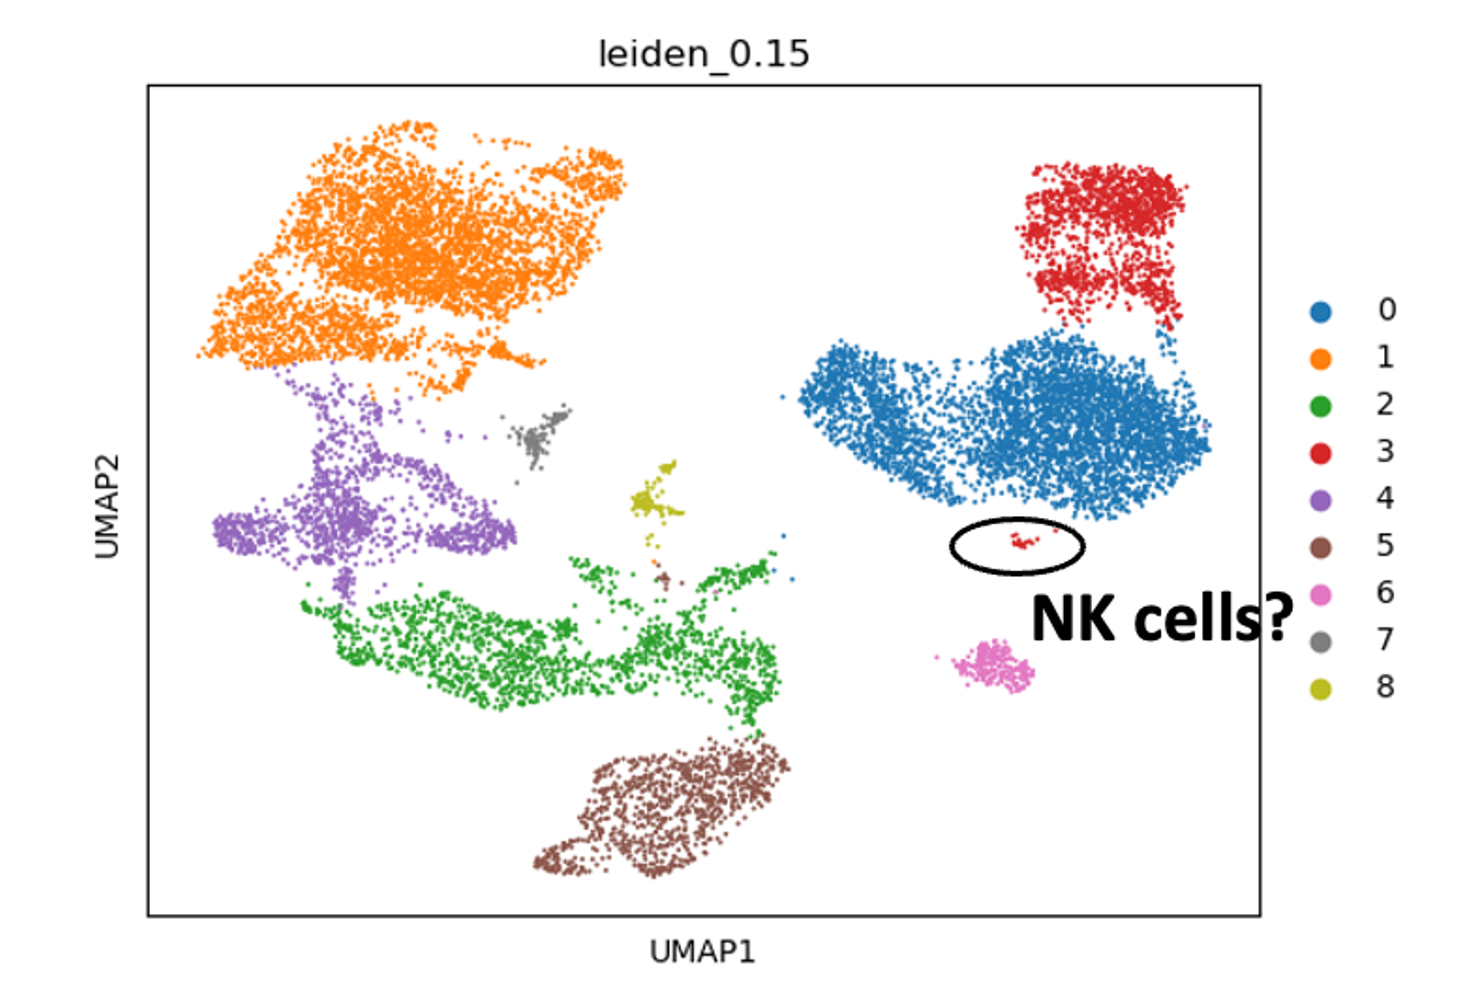

- Based on marker genes, cluster 0 represents NK cells and cluster 6 B cells. 
- Small cluster marked here might be NK cells, but these cells are not included in further analysis.

In [62]:
#save the file!

adata_merged.write('/Users/tiinatuononen/Desktop/Thesis/Project/data/MDS_norm.h5ad')

## Clustering by protein expression

In [51]:
adata_merged_prot = adata_merged.copy()

In [52]:
#Calculating neighbors for UMAPs

sc.pp.neighbors(adata_merged_prot, use_rep="protein_expression_dsb")    

sc.tl.umap(adata_merged_prot)

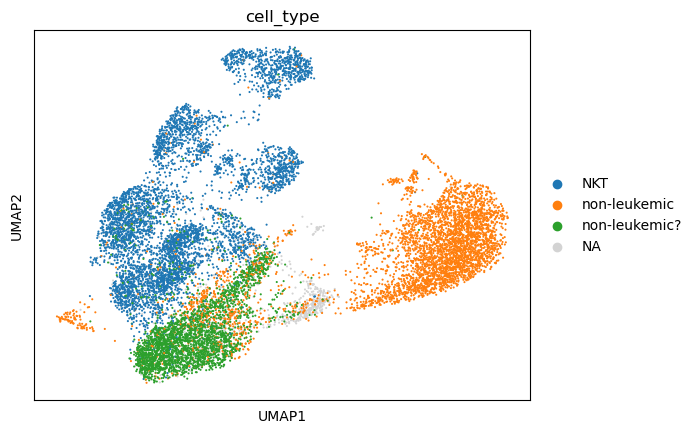

In [53]:

sc.pl.umap(adata_merged_prot, color = ['cell_type'], color_map = 'viridis')

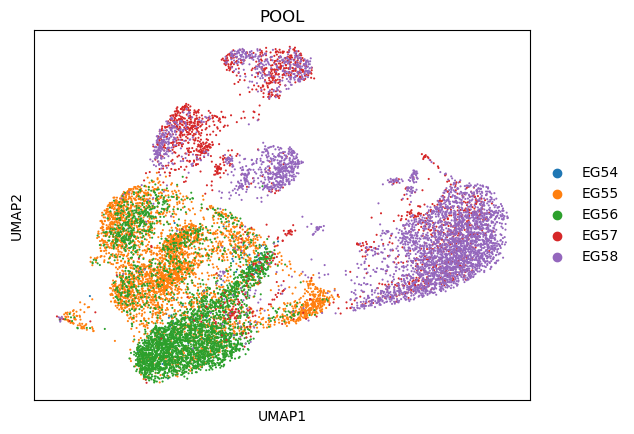

In [54]:
sc.pl.umap(adata_merged_prot, color = ['POOL'], color_map = 'viridis')

## Clustering by RNA

In [55]:
adata_merged_rna = adata_merged.copy()

In [56]:
sc.pp.pca(adata_merged_rna)

In [57]:
#calculating neighbors

sc.pp.neighbors(adata_merged_rna)

sc.tl.umap(adata_merged_rna)

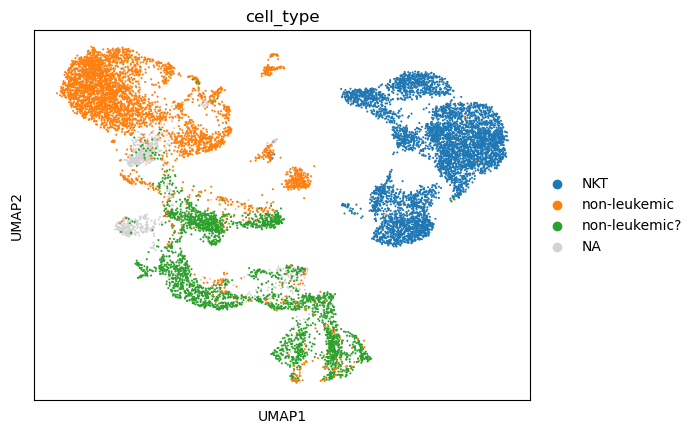

In [59]:
sc.pl.umap(adata_merged_rna, color = ['cell_type'], color_map = 'viridis')

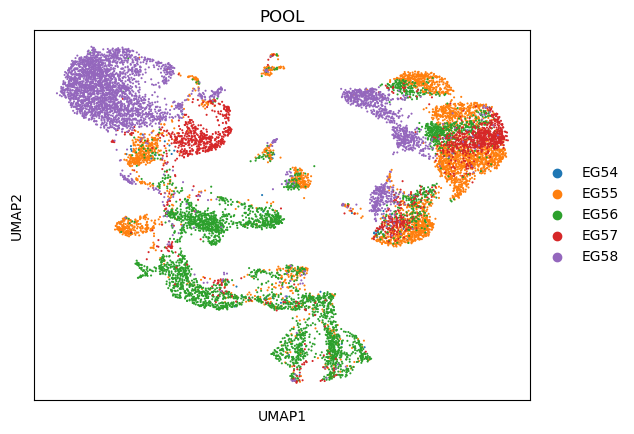

In [58]:
sc.pl.umap(adata_merged_rna, color = ['POOL'], color_map = 'viridis')

## Summary

Latent


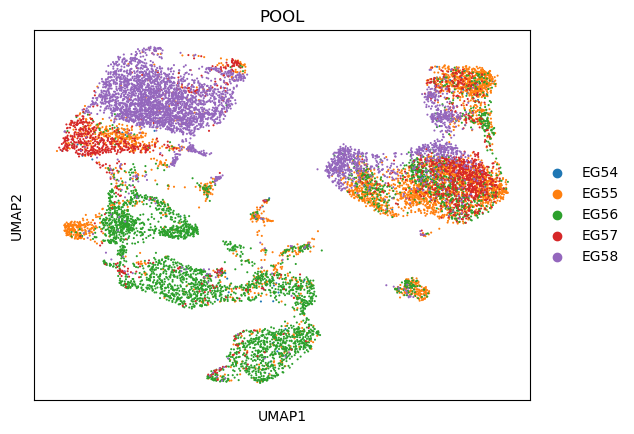

Protein


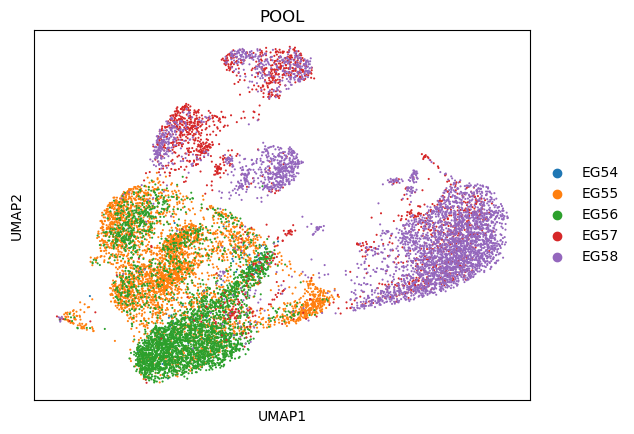

RNA


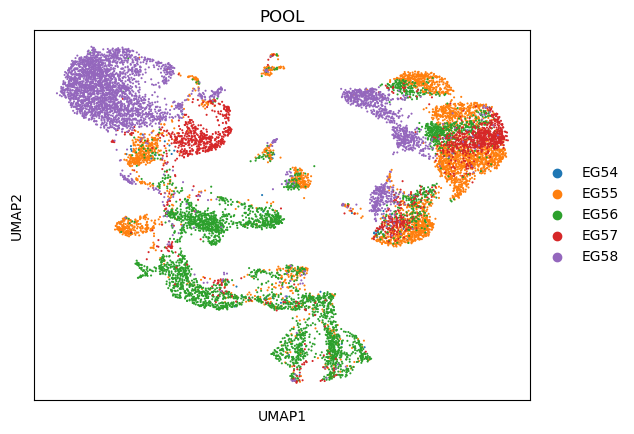

In [60]:
print("Latent")
sc.pl.umap(adata_merged, color = ['POOL'], color_map = 'viridis')

print("Protein")
sc.pl.umap(adata_merged_prot, color = ['POOL'], color_map = 'viridis')

print("RNA")
sc.pl.umap(adata_merged_rna, color = ['POOL'], color_map = 'viridis')

Latent


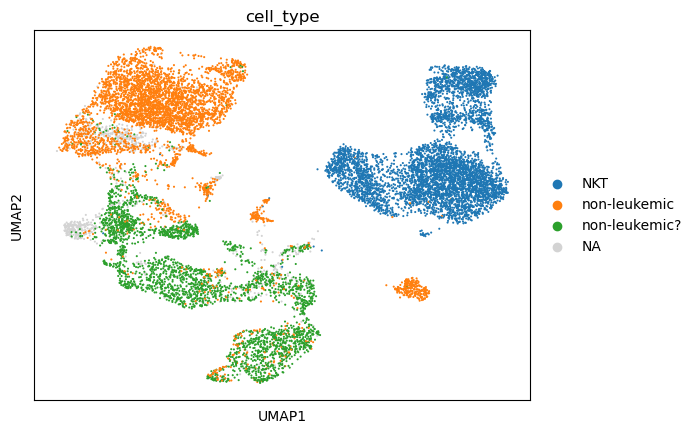

Protein


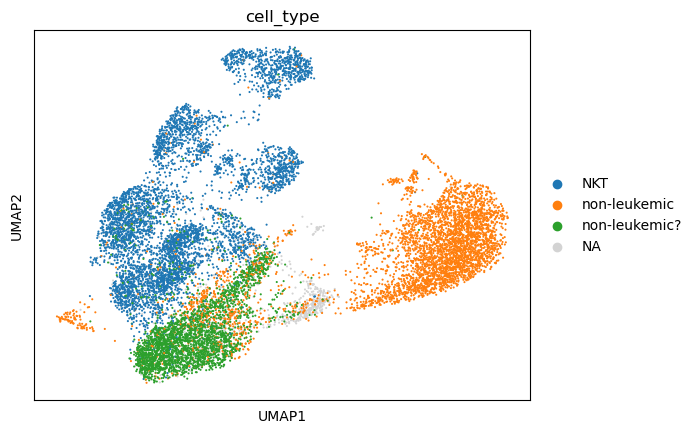

RNA


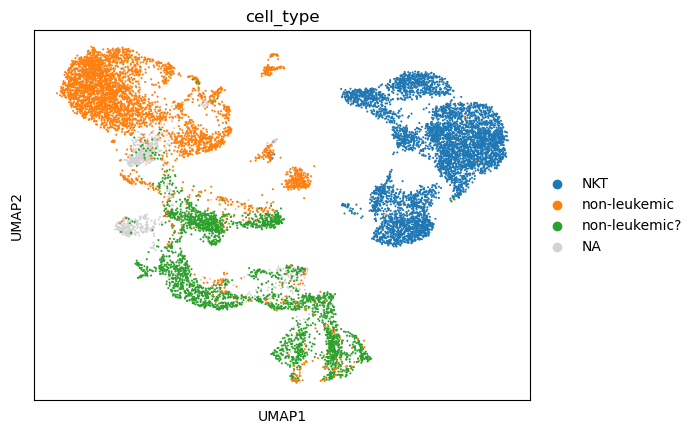

In [61]:
print("Latent")
sc.pl.umap(adata_merged, color = ['cell_type'], color_map = 'viridis')

print("Protein")
sc.pl.umap(adata_merged_prot, color = ['cell_type'], color_map = 'viridis')

print("RNA")
sc.pl.umap(adata_merged_rna, color = ['cell_type'], color_map = 'viridis')